In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# importing or loading the dataset 
dataset = pd.read_csv('Wine.csv') 

# distributing the dataset into two components X and Y 
X = dataset.drop("Customer_Segment", axis=1)
y = dataset["Customer_Segment"]

In [3]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

In [5]:
dataset.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [6]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 

# sc = StandardScaler() 
# X = sc.fit_transform(X)
# print(X)

# sc.fit(X)
# X = sc.transform(X)

for col in X.columns:
    sc = StandardScaler()
    X[col] = sc.fit_transform(X[[col]])
    
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [7]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [8]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 

In [9]:
explained_variance

array([0.36722576, 0.19231879])

In [10]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

C:\Users\itvedant-le2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\itvedant-le2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test) 

In [12]:
# making confusion matrix between 
# test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 

In [13]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))
# f1_score works with only binary values, therefore we shall get an error over here

0.9722222222222222


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


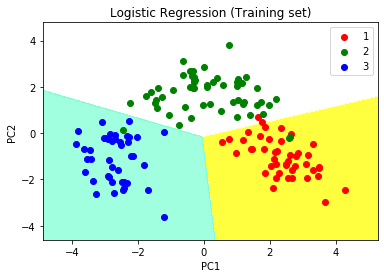

In [14]:
# Predicting the training set 
# result through scatter plot 
from matplotlib.colors import ListedColormap 

# creating a copy of the training set
X_set, y_set = X_train, y_train 

# Here np.meshgrid(x,y) returns 2-D grid coordinates based on the coordinates contained in vectors x and y.
# np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
# the above code is sorting the values of X_set for ploting purpose
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 

# # contourf(X, Y, Z) = this is used to draw the partitions in the plot
# X1.ravel() - reshapes the 2D array into 1D array
# .T creates the transpose of the array
# as the predict function returns 1D array we use .Reshape(X1.shape) to reshape it to 2D array
# alpha is blending value, between 0 (transparent) and 1 (opaque).
# cmap for the colours visible in the plot
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

# # here we are splitting the data into 3 based on y value
# X_set[y_set == j, 0] - this is going to return x values for the plot based on target
# X_set[y_set == j, 1] - this is going to return y values for the plot based on target

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 

# show scatter plot 
plt.show() 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


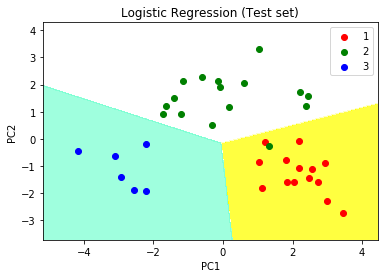

In [15]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show() 
